In [1]:
%matplotlib inline


# Principal components analysis (PCA)

These figures aid in illustrating how a point cloud
can be very flat in one direction--which is where PCA
comes in to choose a direction that is not flat.


In [2]:
# Authors: Gael Varoquaux
#          Jaques Grobler
#          Kevin Hughes
# License: BSD 3 clause

## Create the data



In [3]:
import numpy as np

from scipy import stats

e = np.exp(1)
np.random.seed(4)


def pdf(x):
    return 0.5 * (stats.norm(scale=0.25 / e).pdf(x) + stats.norm(scale=4 / e).pdf(x))


y = np.random.normal(scale=0.5, size=(30000))
x = np.random.normal(scale=0.5, size=(30000))
z = np.random.normal(scale=0.1, size=len(x))

density = pdf(x) * pdf(y)
pdf_z = pdf(5 * z)

density *= pdf_z

a = x + y
b = 2 * y
c = a - b + z

norm = np.sqrt(a.var() + b.var())
a /= norm
b /= norm

## Plot the figures



Eigen Vectors for fig1:
[[-0.33847725 -0.7109608   0.61641536]
 [-0.77400604 -0.1621726  -0.61205775]
 [ 0.53511475 -0.68427684 -0.49539622]]

Eigen Vectors for fig2:
[[-0.33847725 -0.7109608   0.61641536]
 [-0.77400604 -0.1621726  -0.61205775]
 [ 0.53511475 -0.68427684 -0.49539622]]



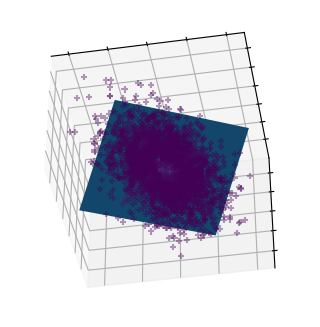

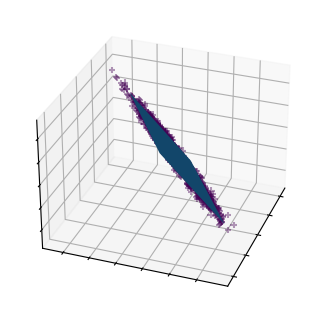

In [34]:
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

# unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401


def plot_figs(fig_num, elev, azim):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = fig.add_subplot(111, projection="3d", elev=elev, azim=azim)
    ax.set_position([0, 0, 0.95, 1])

    ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker="+", alpha=0.4)
    Y = np.c_[a, b, c]

    # Using SciPy's SVD, this would be:
    # _, pca_score, Vt = scipy.linalg.svd(Y, full_matrices=False)

    pca = PCA(n_components=3)
    pca.fit(Y)
    V = pca.components_.T
    V1 = np.array(V)

    print(f"Eigen Vectors for fig{fig_num}:\n{V}\n")
    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V
    x_pca_plane = np.r_[x_pca_axis[:2], -x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], -y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], -z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])
    return V

elev = -40
azim = -80
V1_fn = plot_figs(1, elev, azim)

elev = 30
azim = 20
V2_fn = plot_figs(2, elev, azim)

plt.show()

For fig.1:
Eigen Values are [32723.00513288 12395.26418349    73.92820989]

 Eigen Vectors:
[[-0.33847725 -0.7109608  -0.61641536]
 [-0.77400604 -0.1621726   0.61205775]
 [ 0.53511475 -0.68427684  0.49539622]]



For fig.2:
Eigen Values are [32723.00513288 12395.26418349    73.92820989]

 Eigen Vectors:
[[-0.33847725 -0.7109608  -0.61641536]
 [-0.77400604 -0.1621726   0.61205775]
 [ 0.53511475 -0.68427684  0.49539622]]





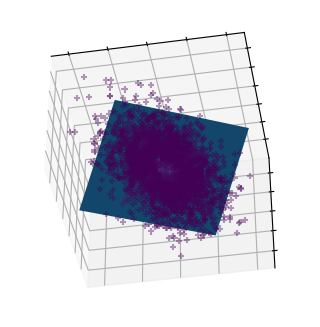

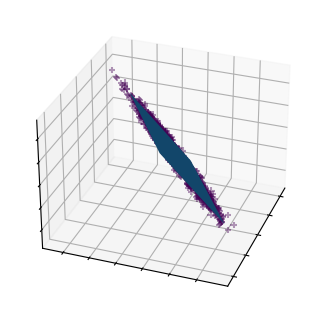

In [42]:
def plot_figs(fig_num, elev, azim):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = fig.add_subplot(111, projection="3d", elev=elev, azim=azim)
    ax.set_position([0, 0, 0.95, 1])

    ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker="+", alpha=0.4)
    Y = np.c_[a, b, c]
    X_0 = Y.T[0]
    X_1 = Y.T[1]
    X_2 = Y.T[2]

    u_0 = X_0 - np.average(X_0)
    u_1 = X_1 - np.average(X_1)
    u_2 = X_2 - np.average(X_2)

    Y = np.array([u_0,u_1,u_2]).T

    P = np.matmul(Y.T,Y)
    eigen, V = np.linalg.eig(P)
    
    print(f"For fig.{fig_num}:\nEigen Values are {eigen}\n\n Eigen Vectors:\n{V}\n\n\n")

    x_pca_axis, y_pca_axis, z_pca_axis = 3 * V
    x_pca_plane = np.r_[x_pca_axis[:2], -x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], -y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], -z_pca_axis[1::-1]]
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])

    return V

elev = -40
azim = -80
V1_eig = plot_figs(1, elev, azim)

elev = 30
azim = 20
V2_eig = plot_figs(2, elev, azim)

plt.show()

In [40]:
diff_V1 = V1_fn - V1_eig
diff_V2 = V2_fn - V2_eig

print(diff_V1,'\n\n',diff_V2)
print("The error here is very small that I more or less get the same value")

[[ 8.32667268e-16  7.77156117e-16  1.23283072e+00]
 [ 3.33066907e-16 -2.44249065e-15 -1.22411550e+00]
 [ 6.66133815e-16 -3.33066907e-16 -9.90792436e-01]] 

 [[ 8.32667268e-16  7.77156117e-16  1.23283072e+00]
 [ 3.33066907e-16 -2.44249065e-15 -1.22411550e+00]
 [ 6.66133815e-16 -3.33066907e-16 -9.90792436e-01]]
The error here is very small that I more or less get the same value
